## Title Analysis and Cuisine

In [25]:
import pandas as pd 
import numpy as np
from foodrec.config.structure.paths import DATASET_PATHS
import joblib

### Load Data

In [26]:
df_cuisine = pd.read_csv(DATASET_PATHS / "cuisine_ALL_RECIPE.csv")
recipe_embedding = joblib.load(DATASET_PATHS / "recipe_embeddings_ALL_RECIPE.pkl")

In [27]:
df_cuisine.head()

,Unnamed: 0,recipe_href,recipe_name,description,rating_rate,ingredients_normalized,tutorial,cooking_time,protein,carbohydrates,fat,kcal,cuisine
0,0,http://allrecipes.com/recipe/1-2-3-cheddar-bro...,1-2-3 Cheddar Broccoli Casserole,'Serve this casserole over hot baked potatoes ...,5.0,"['fig spread', 'broccoli floret', 'cheddar che...",Preheat oven to 350 degrees F. Combine Double ...,25.0,3.16087,6.37818,6.94262,97,['central_europe']
1,3,http://allrecipes.com/recipe/1-2-3-chicken-cac...,1-2-3 Chicken Cacciatore,"'For this tasty and easy cacciatore, chicken i...",3.0,"['olive oil', 'chicken leg', 'pasta sauce']",Heat oil in 12-inch skillet over medium-high h...,60.0,10.22730,4.48565,5.41866,109,['central_europe']
2,5,http://allrecipes.com/recipe/1-2-3-jambalaya/d...,1-2-3 Jambalaya,'Enjoy some Creole comfort the quick and easy ...,4.0,"['olive oil', 'worcestershire sauce', 'fresh p...","In a bowl, combine sausage, shrimp or chicken ...",30.0,8.43391,15.67660,8.67215,179,['north_america']
3,8,http://allrecipes.com/recipe/1-dish-chicken-pa...,1-Dish Chicken Parmesan,"'Ready to serve in less than an hour, this one...",4.0,"['sugar', 'flour', 'salt', 'olive oil', 'spagh...",Mix batter ingredients together in a pre-spray...,45.0,11.54180,16.19300,7.10598,177,['central_europe']
4,9,http://allrecipes.com/recipe/1-dish-pepperoni-...,1-Dish Pepperoni Cheese Pizza Bake,'Pizza was never easier than this--spread the ...,4.0,"['sugar', 'flour', 'salt', 'olive oil', 'shred...",Mix batter ingredients in a pre-sprayed 9-1/2-...,50.0,10.76900,22.66430,10.55790,232,['central_europe']


In [28]:
recipe_embedding.keys()

dict_keys(['id', 'text_embeddings', 'descriptions'])

In [29]:
embedding_list = [vec for vec in recipe_embedding['text_embeddings']]

In [30]:
embedding_df = pd.DataFrame({
    'id':recipe_embedding['id'],
    'description':recipe_embedding['descriptions'],
    'embedding':embedding_list
})

In [31]:
df_cuisine_renamed = df_cuisine.rename(columns={'recipe_href': 'id'})

In [32]:
df_merged = embedding_df.merge(df_cuisine_renamed[['id', 'protein','kcal', 'cuisine']], on='id', how='left')

In [ ]:
def classify_protein(protein_val):
    if pd.isna(protein_val):
        return 'unkown'
    elif protein_val < 10:
        return 'low'
    elif protein_val < 25:
        return 'middle'
    else:
        return 'high'


In [36]:
import ast 
def repair_cuisine(cuisine):
    cuisine_ls = ast.literal_eval(cuisine)
    return cuisine_ls[0]

In [37]:
df_merged['protein_level'] = df_merged['protein'].apply(classify_protein)
df_merged['cuisine_str'] = df_merged['cuisine'].apply(repair_cuisine)

In [38]:
df_merged

,id,description,embedding,protein,kcal,cuisine,protein_level,cuisine_str
0,http://allrecipes.com/recipe/1-2-3-cheddar-bro...,Recipe: 1-2-3 Cheddar Broccoli Casserole | Pre...,"[-0.3081194, -0.54159725, -0.19274291, -0.0419...",3.16087,97,['central_europe'],low,central_europe
1,http://allrecipes.com/recipe/1-2-3-chicken-cac...,Recipe: 1-2-3 Chicken Cacciatore | Preparation...,"[-0.2289675, -0.2288788, -0.15098274, -0.07532...",10.22730,109,['central_europe'],middle,central_europe
2,http://allrecipes.com/recipe/1-2-3-jambalaya/d...,Recipe: 1-2-3 Jambalaya | Preparation: In a bo...,"[0.16316359, 0.13511819, -0.09953359, -0.03436...",8.43391,179,['north_america'],low,north_america
3,http://allrecipes.com/recipe/1-dish-chicken-pa...,Recipe: 1-Dish Chicken Parmesan | Preparation:...,"[-0.31032944, -0.2198537, -0.23062474, -0.3045...",11.54180,177,['central_europe'],middle,central_europe
4,http://allrecipes.com/recipe/1-dish-pepperoni-...,Recipe: 1-Dish Pepperoni Cheese Pizza Bake | P...,"[-0.32891247, -0.35854423, -0.11216147, 0.0863...",10.76900,232,['central_europe'],middle,central_europe
...,...,...,...,...,...,...,...,...
40318,http://allrecipes.com/recipe/zuppa-toscana/det...,Recipe: Zuppa Toscana | Preparation: Preheat o...,"[-0.1900963, -0.3078834, -0.1600238, 0.1268501...",4.38236,117,['central_europe'],low,central_europe
40319,http://allrecipes.com/recipe/zuries-fresh-fig-...,Recipe: Zurie's Fresh Fig Compote Over Cream C...,"[-0.14268148, -0.32116783, -0.18438695, -0.104...",2.68438,197,['central_europe'],low,central_europe
40320,http://allrecipes.com/recipe/zus-fried-apple-p...,Recipe: Zu's Fried Apple Pies | Preparation: P...,"[-0.20396197, -0.15809862, -0.3180436, -0.0087...",2.52434,233,['central_europe'],low,central_europe
40321,http://allrecipes.com/recipe/zweiback-cheeseca...,Recipe: Zweiback Cheesecake | Preparation: Pre...,"[-0.100982815, -0.14992186, -0.100147784, 0.06...",8.61317,277,['central_europe'],low,central_europe


In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
X = np.vstack(embedding_df['embedding'].values)

labels = kmeans.fit_predict(X)
df_merged['cluster'] = labels

In [15]:
protein_distribution = df_merged.groupby('cluster')['protein_level'].value_counts(normalize=True).unstack()


In [40]:
cusisine_dsitribution = df_merged.groupby('cluster')['cuisine_str'].value_counts(normalize=True).unstack()


In [16]:
print(protein_distribution)


protein_level      hoch    leicht    mittel
cluster                                    
0              0.001369  0.618285  0.380345
1              0.000651  0.635819  0.363530
2              0.001762  0.925132  0.073106
3              0.000178  0.984889  0.014933
4              0.000280  0.884583  0.115137


In [45]:
cusisine_dsitribution

cuisine_str,asia,central_europe,latin_america,middle_east,north_america
cluster,,,,,
0,0.190120,0.416368,0.222351,0.006425,0.164736
1,0.043212,0.696343,0.104647,0.003124,0.152675
2,0.075308,0.615531,0.060041,0.002202,0.246917
3,0.034133,0.604444,0.049067,0.001600,0.310756
4,0.170417,0.630965,0.082267,0.011672,0.104678


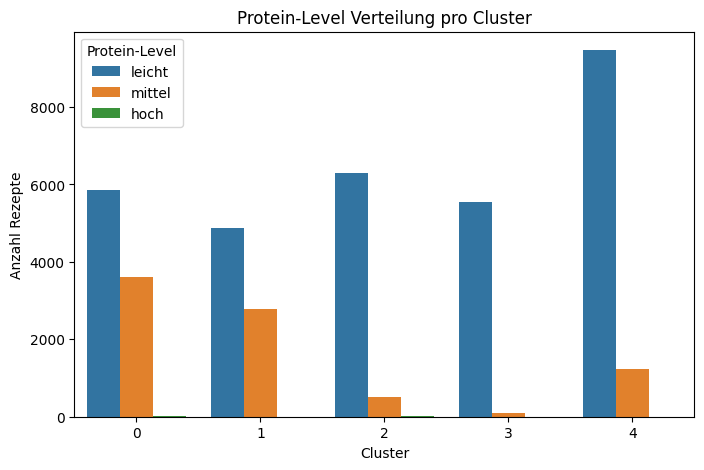

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df_merged, x='cluster', hue='protein_level')
plt.title("Protein-Level Verteilung pro Cluster")
plt.xlabel("Cluster")
plt.ylabel("Anzahl Rezepte")
plt.legend(title="Protein-Level")
plt.show()


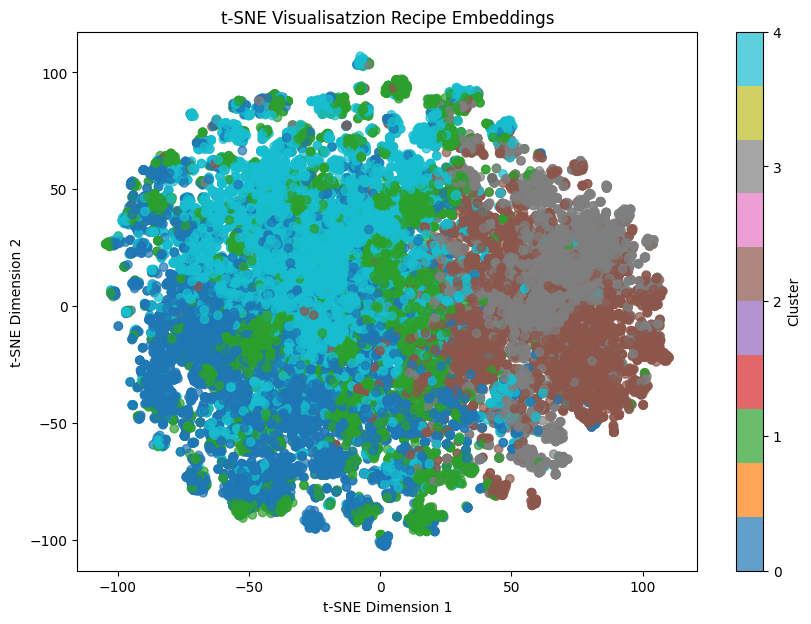

In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# 1. Embeddings als Matrix vorbereiten
X = np.vstack(df_merged['embedding'].values)

# 2. t-SNE auf 2D reduzieren
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(X)

# 3. Clusterlabels (falls noch nicht vorhanden, wie vorher)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# 4. Plot erstellen
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.title("t-SNE Visualisatzion Recipe Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(scatter, ticks=range(5), label='Cluster')
plt.show()


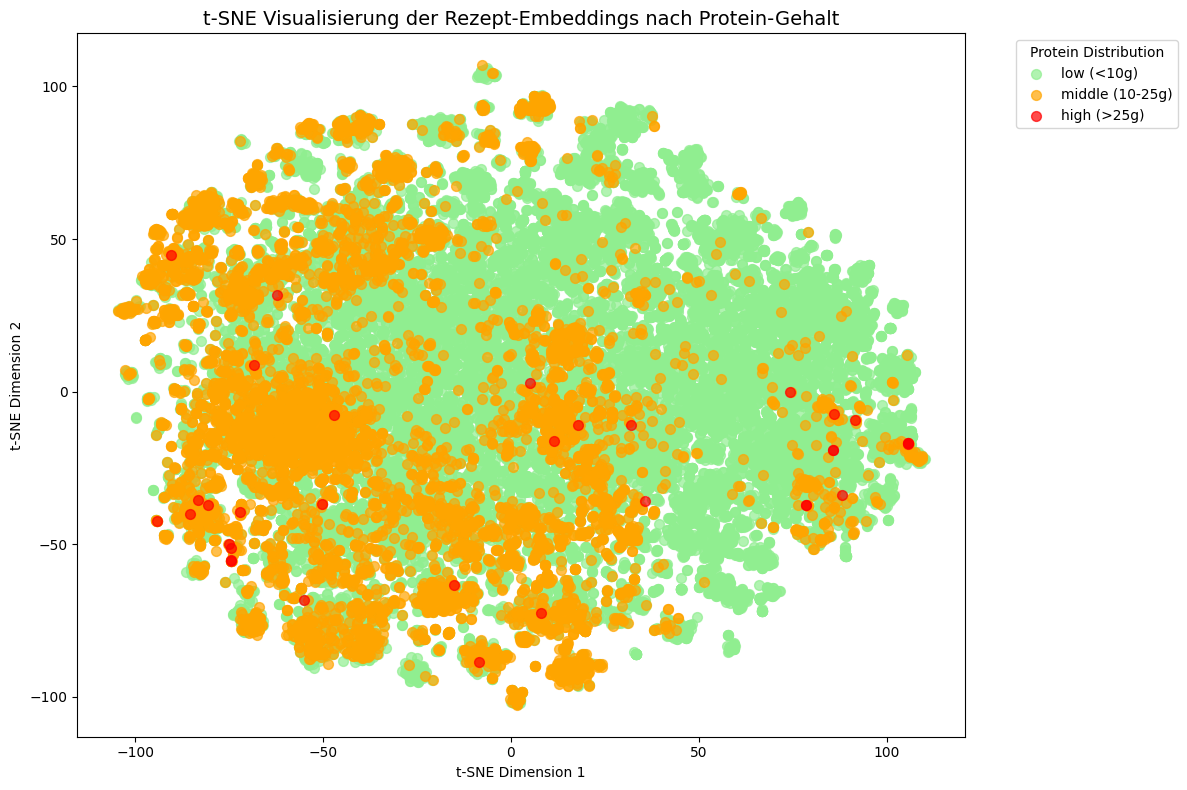

Verteilung der Protein-Level:
protein_level
low       32070
middle     8219
high         34
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

X = np.vstack(df_merged['embedding'].values)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(X)

def classify_protein(protein_val):
    if pd.isna(protein_val):
        return 'unkown'
    elif protein_val < 10:
        return 'low'
    elif protein_val < 25:
        return 'middle'
    else:
        return 'high'

df_merged['protein_level'] = df_merged['protein'].apply(classify_protein)

protein_levels = ['low', 'middle', 'high', 'unkown']
colors = ['lightgreen', 'orange', 'red', 'gray']
color_map = dict(zip(protein_levels, colors))

plt.figure(figsize=(12, 8))

for protein_level in protein_levels:
    mask = df_merged['protein_level'] == protein_level
    if mask.any():
        plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
                   c=color_map[protein_level], 
                   label=f'{protein_level} (<10g)' if protein_level == 'low' else
                         f'{protein_level} (10-25g)' if protein_level == 'middle' else
                         f'{protein_level} (>25g)' if protein_level == 'high' else protein_level,
                   alpha=0.7, s=50)

plt.title("t-SNE Visualisierung der Rezept-Embeddings nach Protein-Gehalt", fontsize=14)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Protein Distribution", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Verteilung der Protein-Level:")
print(df_merged['protein_level'].value_counts())

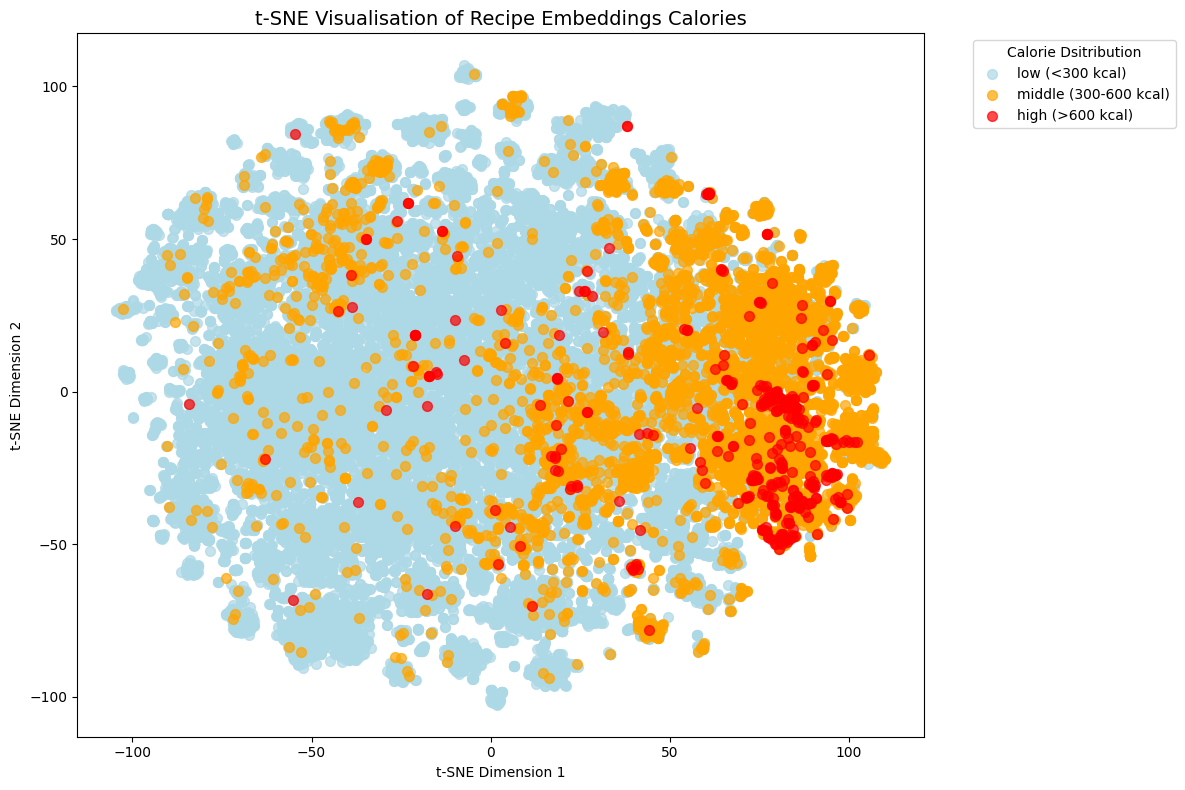

Verteilung der Kcal-Level:
kcal_level
low       33169
middle     6737
high        417
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

X = np.vstack(df_merged['embedding'].values)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(X)

def classify_kcal(kcal_val):
    if pd.isna(kcal_val):
        return 'unkown'
    elif kcal_val < 300:
        return 'low'
    elif kcal_val < 500:
        return 'middle'
    else:
        return 'high'

df_merged['kcal_level'] = df_merged['kcal'].apply(classify_kcal)

kcal_levels = ['low', 'middle', 'high', 'unbekannt']
colors = ['lightblue', 'orange', 'red', 'gray']
color_map = dict(zip(kcal_levels, colors))

plt.figure(figsize=(12, 8))

for kcal_level in kcal_levels:
    mask = df_merged['kcal_level'] == kcal_level
    if mask.any():
        plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
                   c=color_map[kcal_level], 
                   label=f'{kcal_level} (<300 kcal)' if kcal_level == 'low' else
                         f'{kcal_level} (300-600 kcal)' if kcal_level == 'middle' else
                         f'{kcal_level} (>600 kcal)' if kcal_level == 'high' else kcal_level,
                   alpha=0.7, s=50)

plt.title("t-SNE Visualisation of Recipe Embeddings Calories", fontsize=14)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Calorie Dsitribution", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Verteilung der Kcal-Level:")
print(df_merged['kcal_level'].value_counts())

In [36]:
df_merged.head()

,id,description,embedding,protein,kcal,protein_level,cluster,kcal_level
0,/rezept/501146/Mistkratzerli-aus-der-Schweiz-H...,Recipe: Mistkratzerli aus der Schweiz & Heidel...,"[0.11684221, -0.2585938, -0.22058211, -0.13339...",3.9,199.0,leicht,2,niedrig
1,/rezept/500793/Gesundes-Abendessen.html,Recipe: Gesundes Abendessen !\nSüß und %x22 B...,"[0.08965781, -0.27352905, -0.32460642, 0.13668...",10.5,398.0,mittel,2,mittel
2,/rezept/498803/Musik-spezial-Zwiebelsalat.html,Recipe: Musik spezial / Zwiebelsalat\nBeilage ...,"[0.0064815134, -0.43023577, -0.34138057, 0.102...",5.6,206.0,leicht,4,niedrig
3,/rezept/496245/Karotten-Selleriesalat-selber-m...,Recipe: Karotten - Selleriesalat selber machen...,"[0.29627043, -0.4133869, -0.30860054, -0.03911...",1.3,302.0,leicht,1,mittel
4,/rezept/496114/Gemuesebaum-zwischen-Garnelen.html,Recipe: Gemüsebaum zwischen Garnelen !\nLow Ca...,"[0.1344827, -0.16210166, -0.23136657, 0.152385...",0.4,2.0,leicht,3,niedrig


In [42]:
df_merged['cuisine_str'].unique()

array(['central_europe', 'north_america', 'latin_america', 'asia',
       'middle_east'], dtype=object)

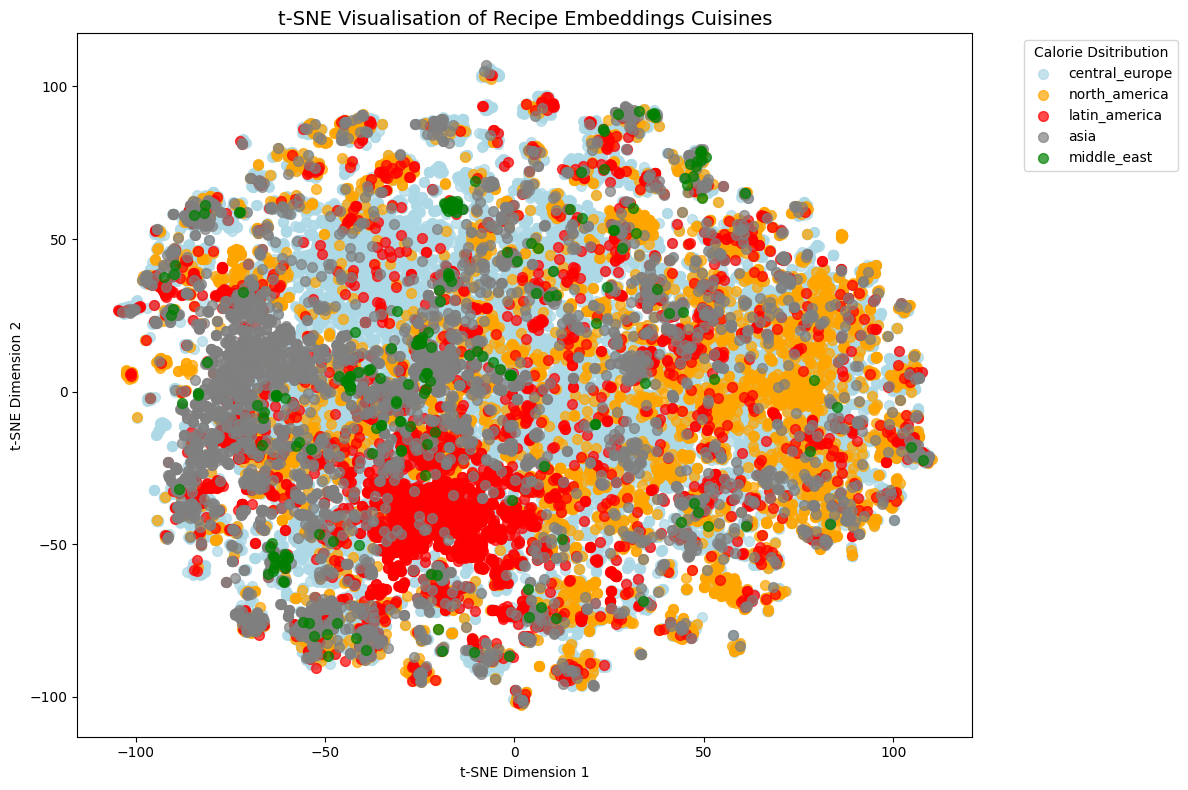

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

X = np.vstack(df_merged['embedding'].values)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(X)
cuisine_labels = ['central_europe', 'north_america', 'latin_america', 'asia', 'middle_east']
colors = ['lightblue', 'orange', 'red', 'gray', 'green']
color_map = dict(zip(cuisine_labels, colors))

plt.figure(figsize=(12, 8))

for cuisine in cuisine_labels:
    mask = df_merged['cuisine_str'] == cuisine
    if mask.any():
        plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
                   c=color_map[cuisine], 
                   label=cuisine,
                   alpha=0.7, s=50)

plt.title("t-SNE Visualisation of Recipe Embeddings Cuisines", fontsize=14)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Calorie Dsitribution", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
